In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [87]:
df_training=pd.read_csv("disease_pre_training.csv")
df_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [88]:
df_training=df_training.drop('Unnamed: 133',axis=1)
df_training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [89]:
df_training.shape

(4920, 133)

In [90]:
df1=df_training['prognosis'].value_counts()
df1

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

<AxesSubplot:>

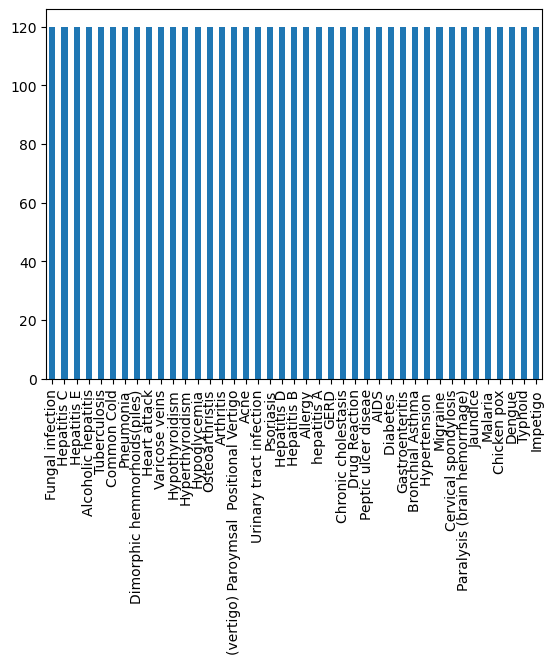

In [91]:
df1.plot(kind='bar')

In [92]:
df_test=pd.read_csv("disease_pre_test.csv")
df_test.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
41,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Fungal infection


In [93]:
df_test['prognosis'].value_counts()

Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1
hepatitis 

<AxesSubplot:ylabel='prognosis'>

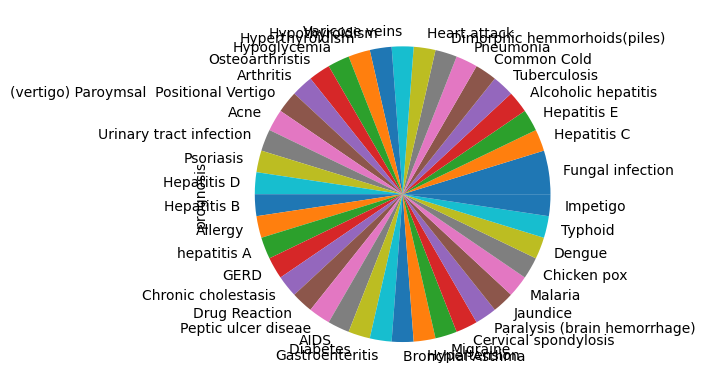

In [94]:
df_test['prognosis'].value_counts().plot(kind='pie')

# LOGISTIC REGRESSION

In [95]:
X_train, y_train = df_training.drop('prognosis', axis = 1), df_training['prognosis']

X_test, y_test = df_test.drop('prognosis', axis = 1), df_test['prognosis']

In [96]:
lr = LogisticRegression(multi_class = 'multinomial')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train):.4f}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred_test):.4f}')

Accuracy Train: 1.0000
Accuracy Test: 1.0000


# Preprocessing

In [97]:
TrainingTarget = df_training.prognosis

df_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [98]:
TestingTarget = df_test.prognosis
TestingTarget

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [99]:
import xgboost as xgb
from sklearn import linear_model,model_selection
from sklearn.preprocessing import LabelEncoder
TrainingTarget

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [100]:
df_training=df_training.drop('prognosis',axis=1)

In [105]:
df_test=df_test.drop('prognosis',axis=1)

In [106]:
TrainingDataNames = TrainingTarget
TestingDataNames = TestingTarget

prognosisLabel = LabelEncoder()

TrainingTarget = prognosisLabel.fit_transform(TrainingTarget)
TestingTarget = prognosisLabel.fit_transform(TestingTarget)
model = linear_model.LogisticRegression()
model.fit(df_training,TrainingTarget)

LogisticRegression()

In [107]:
TrainingTarget

array([15, 15, 15, ..., 38, 35, 27], dtype=int64)

In [108]:
TestingTarget

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15], dtype=int64)

In [109]:
print(model.score(df_training,TrainingTarget),model.score(df_test,TestingTarget))

1.0 1.0


In [115]:
print("The Predicion Code of first training row: ",model.predict([df_training.iloc[0]]))
print("Decoding The Code:", prognosisLabel.inverse_transform([model.predict([df_training.iloc[0]])]))
print("The Truth of first Row:", TrainingDataNames.iloc[0] )

The Predicion Code of first training row:  [15]
Decoding The Code: [15]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# CONFUSION MATRIX

In [116]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(df_test)
y_predicted = y_predicted.astype(int)  # Convert predicted labels to integers
TestingTarget = TestingTarget.astype(int)  # Convert true labels to integers
CM = confusion_matrix(TestingTarget, y_predicted)  # compare between predicted values, actual values
CM

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

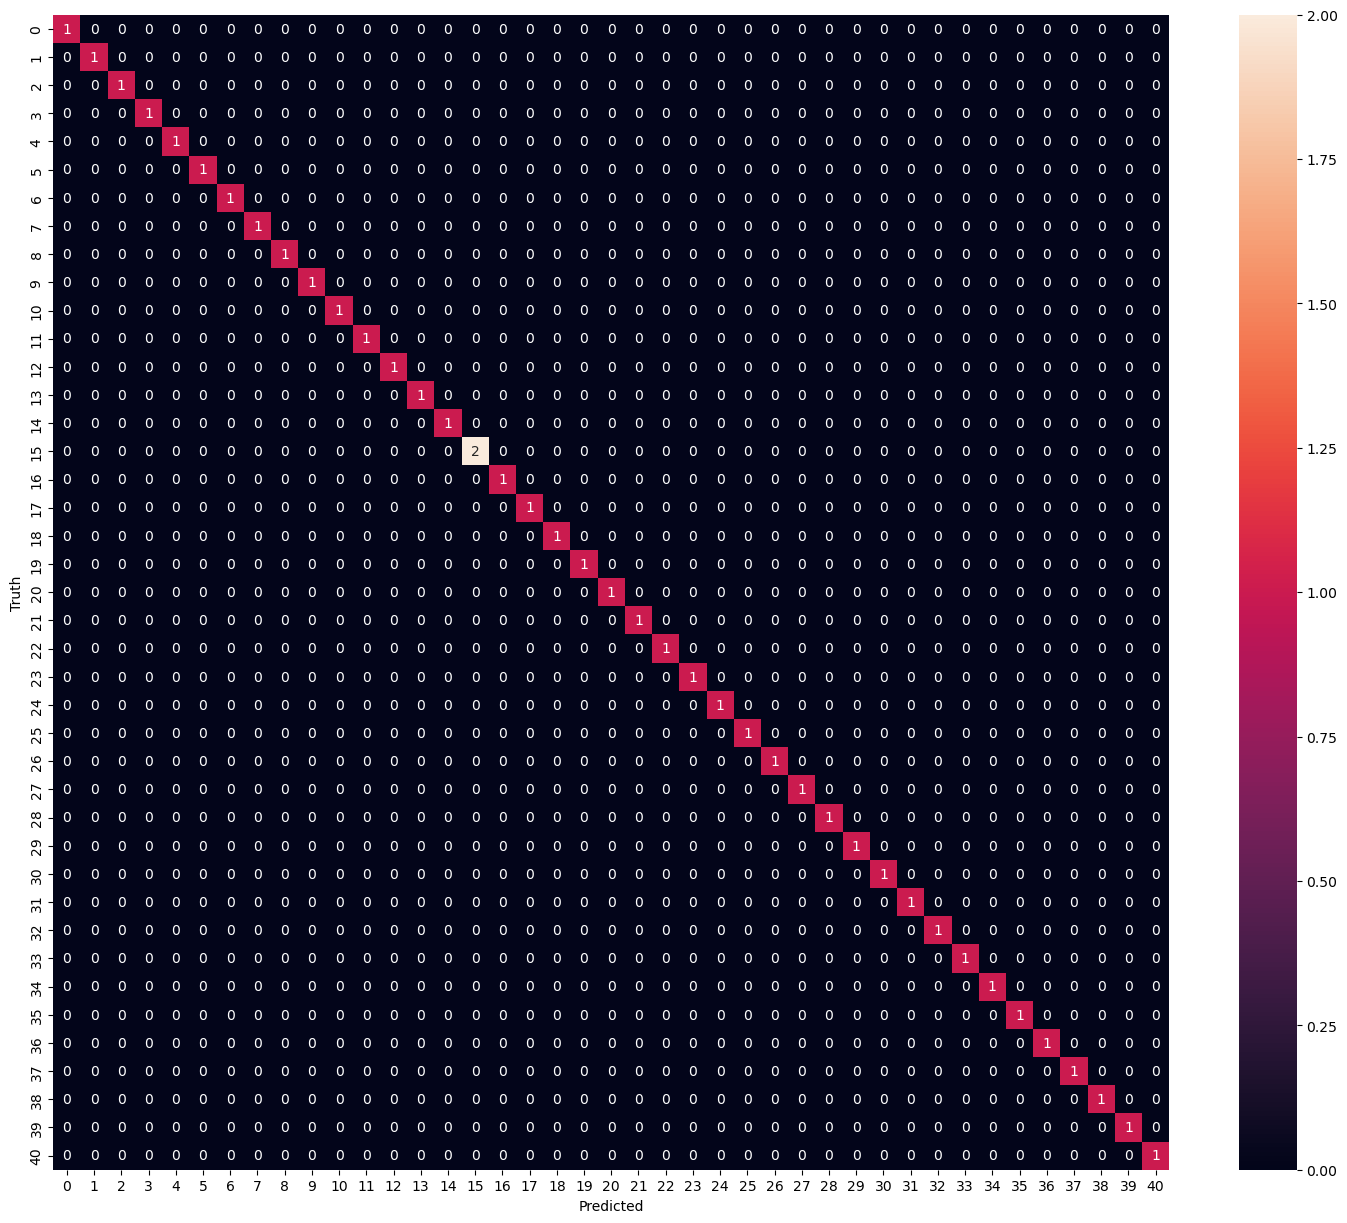

In [117]:

plt.figure(figsize=(18,15))
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()